In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import impute

In [82]:
data_location = "C:\\Users\\feder\\Documents\\Trabajo Practico 1 - Inmobiliaria Properati\\properati.csv"
data = pd.read_csv(data_location)
data.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [52]:
data.columns[data.isna().any()].tolist()

['place_name',
 'geonames_id',
 'lat-lon',
 'lat',
 'lon',
 'price',
 'currency',
 'price_aprox_local_currency',
 'price_aprox_usd',
 'surface_total_in_m2',
 'surface_covered_in_m2',
 'price_usd_per_m2',
 'price_per_m2',
 'floor',
 'rooms',
 'expenses',
 'description',
 'image_thumbnail']

In [53]:
data.shape

(121220, 26)

In [4]:
data.loc[:,"surface_total_in_m2":"surface_covered_in_m2"]
data_prueba = data.loc[:,"surface_total_in_m2":"surface_covered_in_m2"]
data_prueba.iloc[12]

surface_total_in_m2      39.0
surface_covered_in_m2    36.0
Name: 12, dtype: float64

In [12]:
data_Prices = data.copy()
data_filtered_nonull = data_Prices.dropna(subset=['price','surface_total_in_m2', 'surface_covered_in_m2', 'price_aprox_usd','price_usd_per_m2', ])
data_filtered_nonull

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...
6,6,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,...,78.0,1226.415094,1666.666667,NaN,NaN,NaN,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",https://thumbs4.properati.com/5/6GOXsHCyDu1aGx...
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,93.0,7699.115044,9354.838710,NaN,NaN,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...
121216,121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,NaN,...,360.0,1383.333333,1383.333333,NaN,NaN,NaN,http://www.properati.com.ar/1cja6_venta_casa_b...,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,https://thumbs4.properati.com/2/PCc3WuQDjpNZc4...
121217,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,...,39.0,2858.695652,3371.794872,NaN,NaN,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...
121218,121218,sell,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,NaN,NaN,...,48.0,1997.916667,1997.916667,NaN,NaN,NaN,http://www.properati.com.ar/1cja8_venta_depart...,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...,https://thumbs4.properati.com/8/Q12PTvU6BQJ0ib...


In [13]:
print(data_filtered_nonull.shape)

(63352, 26)


In [14]:
print(data.shape)

(121220, 26)


In [18]:
Descarte = len(data) - len(data_filtered_nonull)
Descarte

57868

In [19]:
data_Prices.columns[data.isna().any()].tolist()

['place_name',
 'geonames_id',
 'lat-lon',
 'lat',
 'lon',
 'price',
 'currency',
 'price_aprox_local_currency',
 'price_aprox_usd',
 'surface_total_in_m2',
 'surface_covered_in_m2',
 'price_usd_per_m2',
 'price_per_m2',
 'floor',
 'rooms',
 'expenses',
 'description',
 'image_thumbnail']

In [ ]:
#Probablemente una estrategia para reemplazar los valores faltantes de 'surface_total_in_m2' en vez de eliminaros, podria ser utilizar la media por barrio. Para que no afecte tanto el desvio estandar de la muestra.

In [ ]:
#La superficie total no puede ser menor a la cubierta. Podemos intercambiar los valores de superficie total con superficie cubierta en caso de que se cumpla la condicion de que sea menor..

In [22]:
# puedo completar los valores faltantes de superficie total con la media
data.isnull().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

In [104]:
#Imputar por mediana
Imputer_data_mean= impute.SimpleImputer(missing_values= np.nan, strategy='median', fill_value=None)

In [105]:
data['price_aprox_usd'].mean()

239700.57692847901

In [106]:
data['price_aprox_usd'].median()

145000.0

In [107]:
Data_price_imputed= Imputer_data_mean.fit_transform(data[['price_aprox_usd']])

In [108]:
#Modifique la columna "price_aprox_usd" y la complete con el valor de la mediana
data['price_aprox_usd'] = Data_price_imputed

In [109]:
np.shape(data[['price_aprox_usd']])

(121220, 1)

In [110]:
np.isnan(Data_price_imputed).any()

False

In [111]:
data.price_aprox_usd.isnull().sum() # No hay mas valores nulos en la columna precio por metro cuadrado en dolares.

0

In [112]:
data.price_aprox_usd.median() # La mediana sigue siendo la misma. La mediana no cambia por que nosotros eliminamos todos los valores procentuales con respecto a la mediana por lo que el valor ubicado al medio jamas cambiara

145000.0

In [93]:
data.price_aprox_usd.describe()

count    1.008100e+05
mean     2.397006e+05
std      3.913239e+05
min      0.000000e+00
25%      8.973388e+04
50%      1.450000e+05
75%      2.650000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

In [179]:
# Filtro por la columna precio por metros cuadrados entre 0.2 y 0.95 de los datos para
data_filtered = data[(data.price_usd_per_m2 < data.price_usd_per_m2.quantile(.95)) & (data.price_usd_per_m2 > data.price_usd_per_m2.quantile(.02))]

In [175]:
data_filtered.price_usd_per_m2.describe()

count    63796.000000
mean      1812.357859
std        833.550264
min        200.298833
25%       1225.775072
50%       1770.833333
75%       2375.000000
max       4081.819192
Name: price_usd_per_m2, dtype: float64

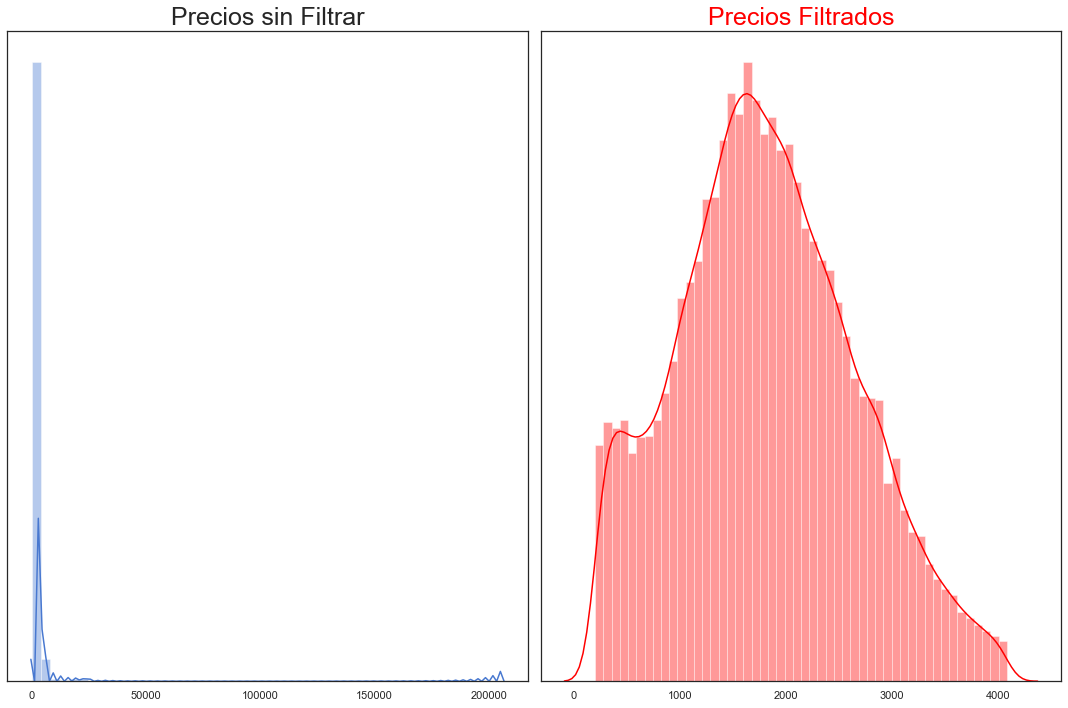

In [151]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(15, 10))



g1=sns.distplot(data[['price_usd_per_m2']],ax=axes[0])
g1.axes.set_title('Precios sin Filtrar', fontsize=25)

g2 = sns.distplot(data_filtered[['price_usd_per_m2']], color="red",ax=axes[1])
g2.axes.set_title('Precios Filtrados', fontsize=25,  color="Red")

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()



In [79]:
# El primer grafico muestra resultados en forma de L. Con muchos casos en 0/M2 y otro tanto en 200000/M2 USD. Eliminamos los precios nulos.Para ver la disribucion de los precios, se decidio trabajar con los quantiles entre 0.2 y 0.95. En el grafico de la derecha se puede apreciar que la mayoria de los casos tiene un valor aproximado de 2000 USD/m2 p

In [207]:
#Agrupo barrios por superficie cubierta para estimar la media y extraporlarla a los valores NaN
barrios = data_filtered[["place_name", 'surface_covered_in_m2']].groupby('place_name').mean().sort_values('surface_covered_in_m2', ascending=False)
barrios

,surface_covered_in_m2
place_name,
Delta,3717.727273
Murphy,3200.000000
Villa Soldati,1951.500000
Esquel,1300.000000
Grand Bell,1200.000000
...,...
Santa Trinidad,NaN
Serodino,NaN
Tafí Viejo,NaN


In [173]:
table = pd.pivot_table(data_filtered, values='surface_total_in_m2', index=['place_name'], aggfunc=np.mean)
Expensive_m2 = table.sort_values('surface_total_in_m2', ascending=False).iloc[:4]
Expensive_m2

,surface_total_in_m2
place_name,
Villa Icho Cruz,4850.0
Grand Bell,3715.0
Murphy,3200.0
Fátima,2682.0


<ipython-input-200-ed653f811f5a>:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  correlation_val.values[[np.arange(6)]*2] =0


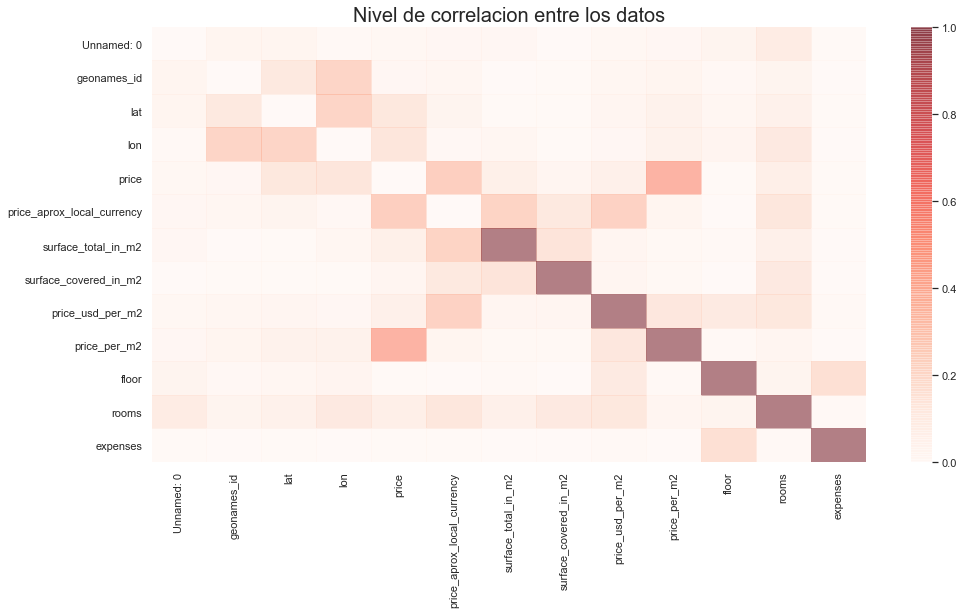

In [200]:
fig, ax = plt.subplots(figsize=(16,8))         # Sample figsize in inches
correlation_val = data.corr().abs()
correlation_val.values[[np.arange(6)]*2] =0
ax = plt.axes()
sns.heatmap(correlation_val,cmap='Reds', alpha=0.5,ax=ax);
ax.set_title('Nivel de correlacion entre los datos', fontsize=20)
plt.show()

<ipython-input-205-60157b83f285>:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  correlation_val.values[[np.arange(6)]*2] =0


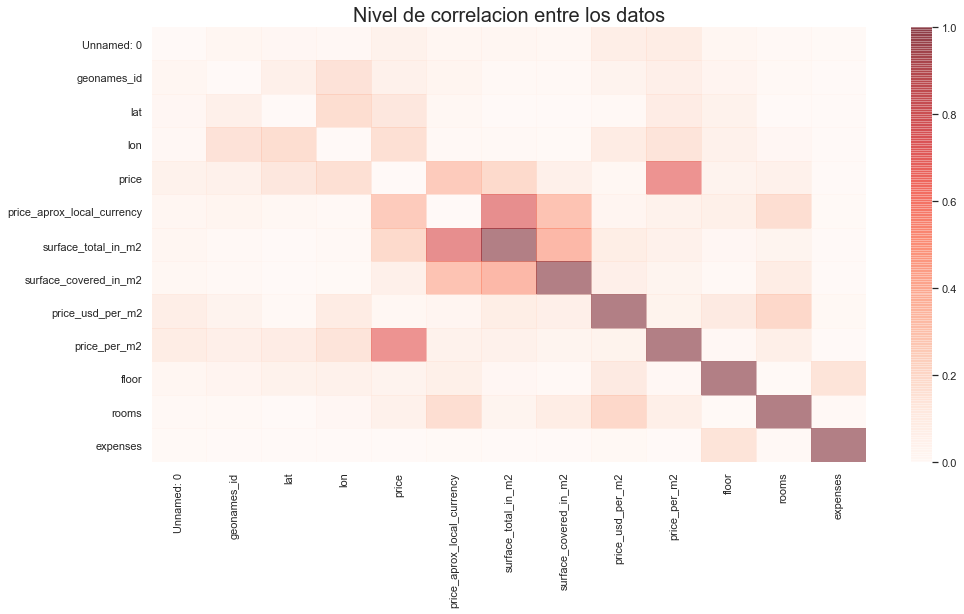

In [205]:
fig, ax = plt.subplots(figsize=(16,8))         # Sample figsize in inches
correlation_val = data_filtered.corr().abs()
correlation_val.values[[np.arange(6)]*2] =0
ax = plt.axes()
sns.heatmap(correlation_val,cmap='Reds', alpha=0.5,ax=ax);
ax.set_title('Nivel de correlacion entre los datos', fontsize=20)
plt.show()